In [166]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import poisson
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels as st
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from tabulate import tabulate
import pmdarima as pm
from dateutil.relativedelta import relativedelta
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

In [167]:
df = pd.read_csv('Datos_preprocesados_accidentes_y_victimas_accidentes.csv')

In [168]:
db_provincia2 = df[df['COD_PROVINCIA'] == 2]

In [169]:
num_victimas_dia_semana2 = db_provincia2.groupby(['ANYO', 'MES', 'DIA_SEMANA', 'HORA'])['TOTAL_VICTIMAS_24H'].sum()

In [170]:
num_victimas_dia_semana2

ANYO  MES  DIA_SEMANA  HORA
2016  1    1           11      1
                       14      2
                       19      2
                       20      1
           2           8       1
                              ..
2020  12   7           11      1
                       12      1
                       15      1
                       19      1
                       21      1
Name: TOTAL_VICTIMAS_24H, Length: 3362, dtype: int64

In [171]:
num_accidentes_por_dia_semana2 = db_provincia2.groupby(['ANYO', 'MES'])['DIA_SEMANA'].value_counts()

In [172]:
num_accidentes_por_dia_semana2

ANYO  MES  DIA_SEMANA
2016  1    5              9
           7              8
           2              6
           4              6
           1              5
                         ..
2020  12   5             10
           6             10
           3              9
           7              7
           2              4
Name: count, Length: 417, dtype: int64

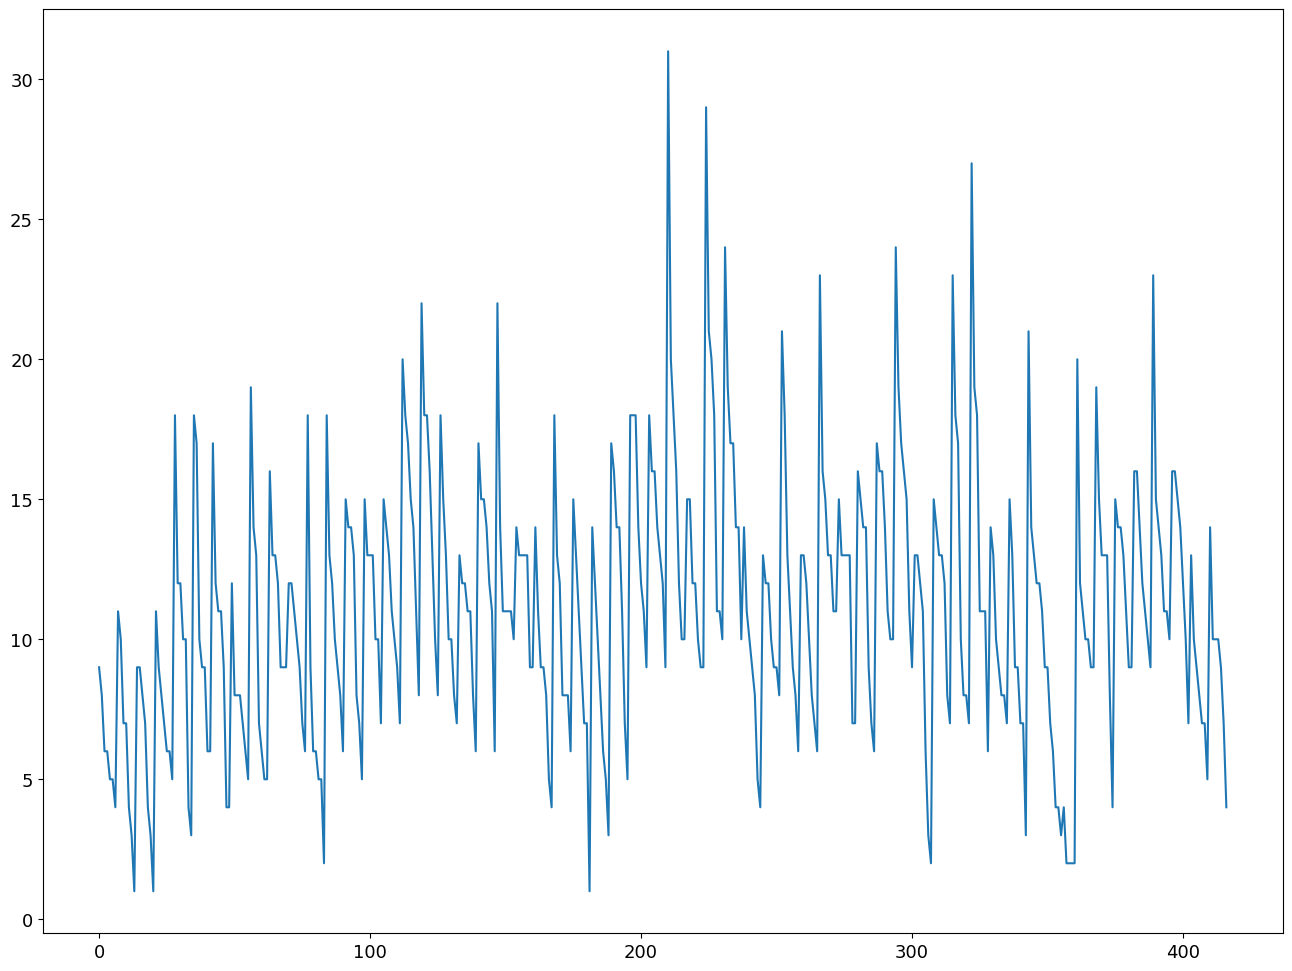

In [173]:
plt.plot(num_accidentes_por_dia_semana2.values)

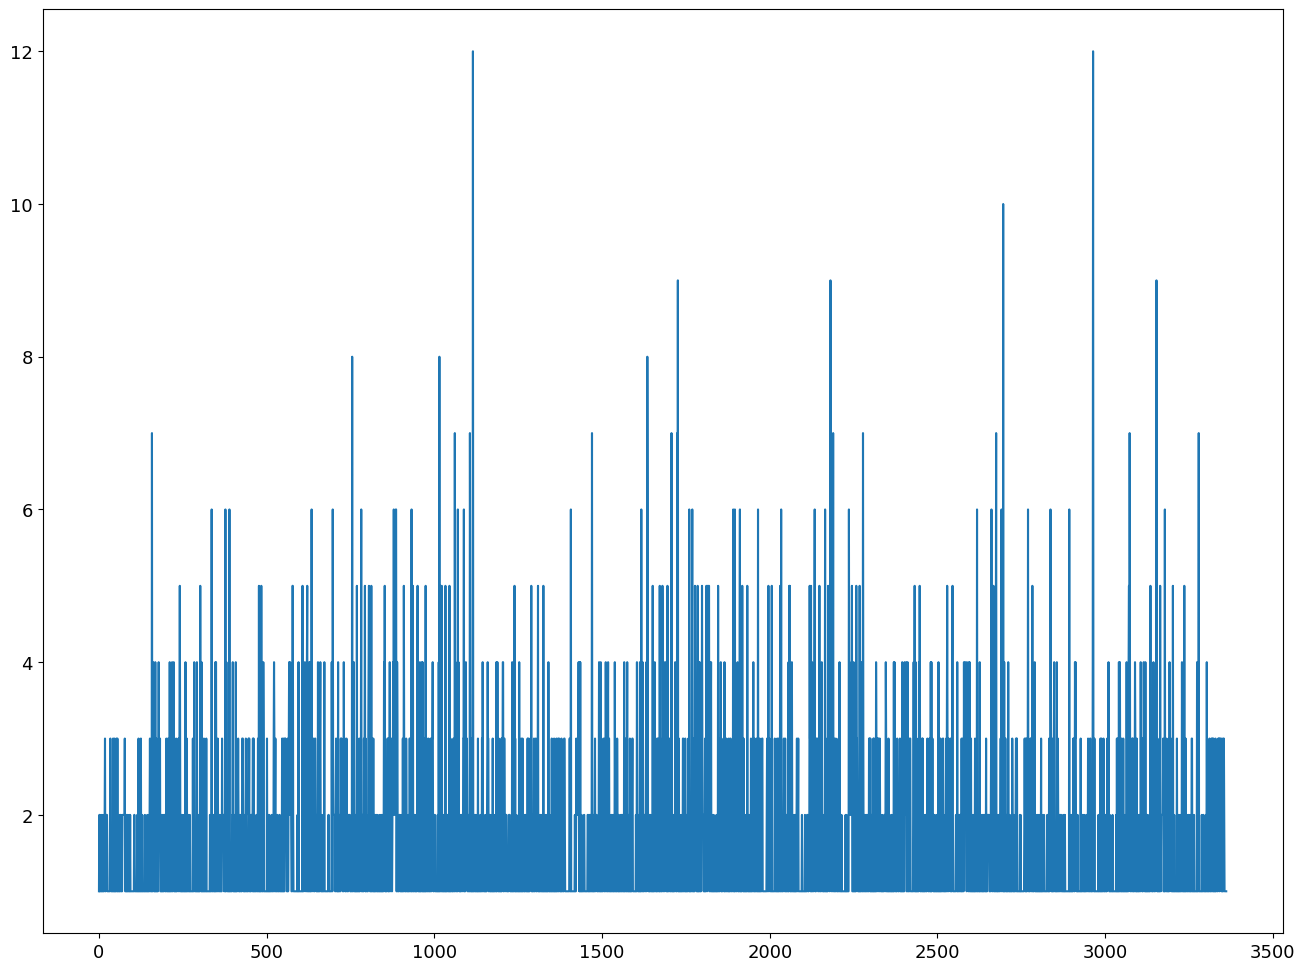

In [174]:
plt.plot(num_victimas_dia_semana2.values)

In [175]:
num_accidentes_por_dia_semana2 = num_accidentes_por_dia_semana2.reset_index()

In [176]:
num_accidentes_por_dia_semana2['FECHA'] = num_accidentes_por_dia_semana2.apply(lambda row: str(row['ANYO']) + '/' + str(row['MES']) + '/' + str(row['DIA_SEMANA']), axis = 1)

In [177]:
num_accidentes_por_dia_semana2

,ANYO,MES,DIA_SEMANA,count,FECHA
0,2016,1,5,9,2016/1/5
1,2016,1,7,8,2016/1/7
2,2016,1,2,6,2016/1/2
3,2016,1,4,6,2016/1/4
4,2016,1,1,5,2016/1/1
...,...,...,...,...,...
412,2020,12,5,10,2020/12/5
413,2020,12,6,10,2020/12/6
414,2020,12,3,9,2020/12/3
415,2020,12,7,7,2020/12/7


In [178]:
num_victimas_dia_semana2 = num_victimas_dia_semana2.reset_index()

In [179]:
num_victimas_dia_semana2

,ANYO,MES,DIA_SEMANA,HORA,TOTAL_VICTIMAS_24H
0,2016,1,1,11,1
1,2016,1,1,14,2
2,2016,1,1,19,2
3,2016,1,1,20,1
4,2016,1,2,8,1
...,...,...,...,...,...
3357,2020,12,7,11,1
3358,2020,12,7,12,1
3359,2020,12,7,15,1
3360,2020,12,7,19,1


In [180]:
num_victimas_dia_semana2['FECHA'] = num_victimas_dia_semana2.apply(lambda row: str(row['ANYO']) + '/' + str(row['MES']) + '/' + str(row['DIA_SEMANA']), axis = 1)

In [181]:
num_victimas_dia_semana2

,ANYO,MES,DIA_SEMANA,HORA,TOTAL_VICTIMAS_24H,FECHA
0,2016,1,1,11,1,2016/1/1
1,2016,1,1,14,2,2016/1/1
2,2016,1,1,19,2,2016/1/1
3,2016,1,1,20,1,2016/1/1
4,2016,1,2,8,1,2016/1/2
...,...,...,...,...,...,...
3357,2020,12,7,11,1,2020/12/7
3358,2020,12,7,12,1,2020/12/7
3359,2020,12,7,15,1,2020/12/7
3360,2020,12,7,19,1,2020/12/7


In [182]:
num_accidentes_por_dia_semana2

,ANYO,MES,DIA_SEMANA,count,FECHA
0,2016,1,5,9,2016/1/5
1,2016,1,7,8,2016/1/7
2,2016,1,2,6,2016/1/2
3,2016,1,4,6,2016/1/4
4,2016,1,1,5,2016/1/1
...,...,...,...,...,...
412,2020,12,5,10,2020/12/5
413,2020,12,6,10,2020/12/6
414,2020,12,3,9,2020/12/3
415,2020,12,7,7,2020/12/7


In [183]:
num_victimas_dia_semana2

,ANYO,MES,DIA_SEMANA,HORA,TOTAL_VICTIMAS_24H,FECHA
0,2016,1,1,11,1,2016/1/1
1,2016,1,1,14,2,2016/1/1
2,2016,1,1,19,2,2016/1/1
3,2016,1,1,20,1,2016/1/1
4,2016,1,2,8,1,2016/1/2
...,...,...,...,...,...,...
3357,2020,12,7,11,1,2020/12/7
3358,2020,12,7,12,1,2020/12/7
3359,2020,12,7,15,1,2020/12/7
3360,2020,12,7,19,1,2020/12/7


In [184]:
df_provincia2 = num_accidentes_por_dia_semana2.merge(num_victimas_dia_semana2, on = 'FECHA')

In [185]:
df_provincia2 = df_provincia2[['ANYO_x', 'FECHA', 'count', 'TOTAL_VICTIMAS_24H']]

In [186]:
df_provincia2.describe()

,ANYO_x,count,TOTAL_VICTIMAS_24H
count,3362.000000,3362.000000,3362.000000
mean,2018.049673,12.484533,1.740333
std,1.345063,4.607075,1.161250
min,2016.000000,1.000000,1.000000
25%,2017.000000,9.000000,1.000000
50%,2018.000000,12.000000,1.000000
75%,2019.000000,15.000000,2.000000
max,2020.000000,31.000000,12.000000
